In [1]:
import os
from helpers import load_data, standardize

data_directory = '../data'
train_dataset_path = os.path.join(data_directory, 'train.csv')

ids, labels, feature_names, raw_features = load_data(train_dataset_path)
print('Successfully loaded the data')

Successfully loaded the data


In [3]:
print(ids)
print(labels)
print(feature_names)
print(raw_features)

[100000 100001 100002 ... 349997 349998 349999]
['s' 'b' 'b' ... 's' 'b' 'b']
['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']
[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0

In [4]:
jet_features_start_idx = 22 # The features about the jet start from this index onwards, there are 8 features
jet_feature_names = feature_names[jet_features_start_idx:]
jet_features = raw_features[:, jet_features_start_idx:]
print(jet_features.shape)

(250000, 8)


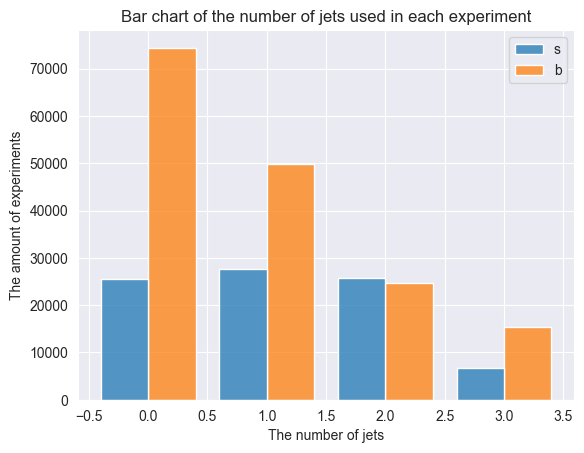

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure('Jet Usage')
ax = sns.histplot(x=jet_features[:, 0], shrink=.8, multiple="dodge", hue=labels, discrete=True)
ax.set(title='Bar chart of the number of jets used in each experiment', xlabel='The number of jets', ylabel='The amount of experiments')
plt.show()

In [6]:
# Filter experiments where no jets have been used
mask = jet_features[:, 0] > 1
used_jet_features = jet_features[mask, :]
used_labels = labels[mask]

# Things to look out for when standardizing: make sure there are no discrete features,
# and take into consideration what is being standardized
# ! The standardizing happens in-place !
mean, std = standardize(used_jet_features)

print(mean.shape)
print(std.shape)

(8,)
(8,)


Features: PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi, PRI_jet_subleading_pt, PRI_jet_subleading_eta, PRI_jet_subleading_phi, PRI_jet_all_pt



  0%|          | 0/6 [00:00<?, ?it/s]

Pair: (2, 3)


<Figure size 640x480 with 0 Axes>

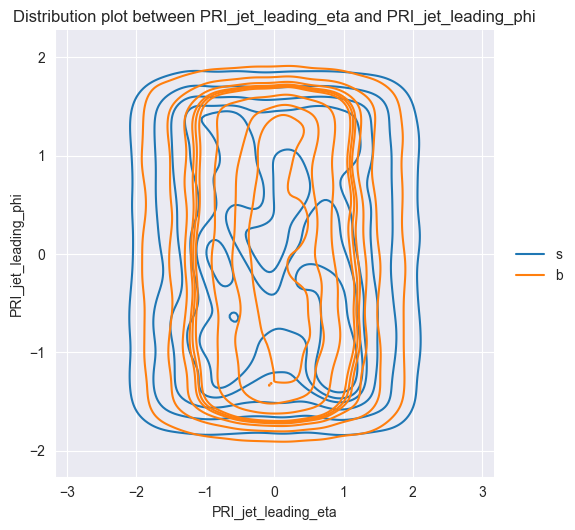

<Figure size 640x480 with 0 Axes>

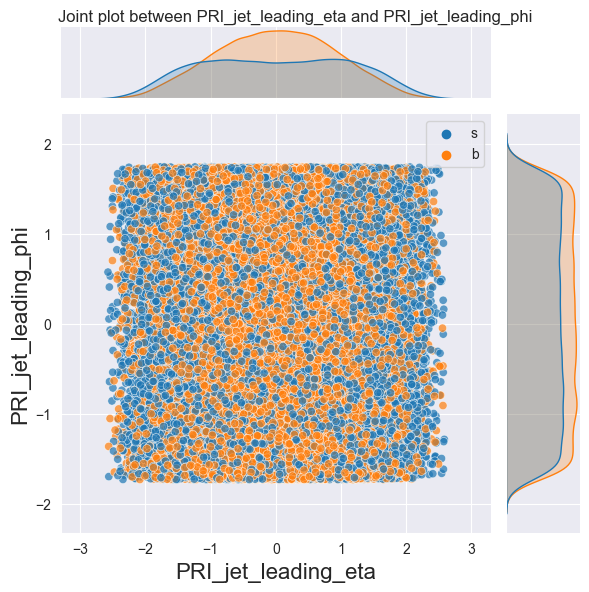

Pair: (2, 4)


  0%|          | 0/6 [00:51<?, ?it/s]

KeyboardInterrupt



<Figure size 640x480 with 0 Axes>

Error in callback <function flush_figures at 0x00000214A8895F30> (for post_execute):


KeyboardInterrupt: 

In [7]:
from tqdm import tqdm


def create_jointplot(feature_1_idx, feature_2_idx):
    plt.figure()
    h = sns.jointplot(x=used_jet_features[:, feature_1_idx], y=used_jet_features[:, feature_2_idx], hue=used_labels)
    h.set_axis_labels(jet_feature_names[feature_1_idx], ylabel=jet_feature_names[feature_2_idx], fontsize=16)
    h.fig.suptitle('Joint plot between '+jet_feature_names[feature_1_idx]+' and '+jet_feature_names[feature_2_idx])
    h.ax_joint.collections[0].set_alpha(0.7) # Set the transparency of the datapoints
    h.fig.tight_layout()
    h.fig.subplots_adjust(top=0.95) # Adjust the height of the plot
    #plt.savefig(fname='../out/'+str((i, j))+'-joint.jpg')
    plt.show()

def create_displot(feature_1_idx, feature_2_idx):
    plt.figure()
    axis = sns.displot(x=used_jet_features[:, feature_1_idx], y=used_jet_features[:, feature_2_idx], hue=used_labels, kind='kde')
    axis.set(title='Distribution plot between '+jet_feature_names[feature_1_idx]+' and '+jet_feature_names[feature_2_idx],
           xlabel=jet_feature_names[feature_1_idx], ylabel=jet_feature_names[feature_2_idx])
    #plt.savefig(fname='../out/'+str((i, j))+'-dist.jpg')
    plt.show()

print('Features:', ', '.join(jet_feature_names[1:]), end='\n\n')
# Leading jet and sub-leading jet. The subleading jet might only make sense if there are >1 jet,
# so make sure to test for that in the mask of the cell above!

# Runs a loop over all pairs (since covariance is symmetric, we only have to check each pair once)
for i in tqdm(range(2, 8)):
    for j in range(i+1, 8):
        print('Pair:', str((i, j)))
        # Switch between jointplot or displot (estimates the joint distribution instead)
        create_displot(i, j)
        create_jointplot(i, j)

# Observations:
# - pairs (2,5), (3,6), (4,7) have some noticeable correlation (maybe due to the leading jet being related to the sub-leading jet)

In [7]:
import numpy as np

# Compute the covariance matrix of the features
## TODO: Find out why the covariances are all so high... They do not seem to be that linearly correlated
correlation_coefs = np.corrcoef(jet_features[1:].T)
print('Correlation matrix:')
for i in range(len(correlation_coefs)):
    print(' '.join('{:.3f}'.format(corr_coef) for corr_coef in correlation_coefs[i]))

Correlation matrix:
1.000 0.832 0.817 0.817 0.870 0.868 0.868 0.804
0.832 1.000 0.996 0.996 0.546 0.545 0.545 0.667
0.817 0.996 1.000 1.000 0.521 0.522 0.522 0.608
0.817 0.996 1.000 1.000 0.521 0.522 0.522 0.608
0.870 0.546 0.521 0.521 1.000 0.999 0.999 0.729
0.868 0.545 0.522 0.522 0.999 1.000 1.000 0.713
0.868 0.545 0.522 0.522 0.999 1.000 1.000 0.713
0.804 0.667 0.608 0.608 0.729 0.713 0.713 1.000
